In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/research/prompt_engineering/RL
!pip install tiktoken
!pip install --upgrade "httpx<0.28"
import json
import trainer_all_words as trainer
import utils
from openai import OpenAI
with open("config.json") as config_file:
    config = json.load(config_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/research/prompt_engineering/RL


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


The OpenAI API does not have a direct parameter to set a random seed for reproducibility in its responses. The behavior of the models is inherently non-deterministic due to randomness in the generation process.

In [2]:
RANDOM_SAMPLES = True
EPISODES = 250
VOCABULARY = "vocabulary_011625"
PROMPT_INIT = ["find", "all", "material", "entity"]
FIXED_IDS = [2]
MEAN_RANDOM = 0.707
STD_RANDOM = 0.0488
D_EMBED = 256
LR = 1e-3
SCHEDULER = True
SCHEDULER_PERIOD = 200
HIDDEN = 128
SEED = 174
PRINT_INTERVAL = 5
SAVE = True
PLOT = True
DATASET = "train"

Using device: cpu
Vocabulary size: 45
Initial prompt: ['find', 'all', 'material', 'entity']
Reward: 0.7490413572972912

Episode: 0 Prompt: ['discover', 'title', 'material', 'write'] Reward: 0.6348509247059972
Best prompt: ['find', 'all', 'material', 'entity'] Best reward: 0.7490413572972912
Episode: 5 Prompt: ['highlight', 'whole', 'material', 'existence'] Reward: 0.699743580237157
Best prompt: ['substance', 'name', 'material', 'summarize'] Best reward: 0.7655362238123488
Episode: 10 Prompt: ['uncover', 'object', 'material', 'title'] Reward: 0.7577493675532891
Best prompt: ['substance', 'name', 'material', 'summarize'] Best reward: 0.7655362238123488
Episode: 15 Prompt: ['recognize', 'whole', 'material', 'retrieve'] Reward: 0.6421576246123176
Best prompt: ['substance', 'name', 'material', 'summarize'] Best reward: 0.7655362238123488
Episode: 20 Prompt: ['summarize', 'recognize', 'material', 'locate'] Reward: 0.729557387833513
Best prompt: ['substance', 'name', 'material', 'summarize'] 

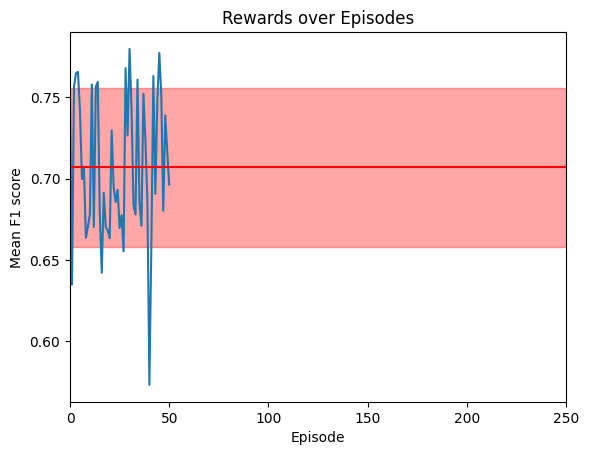

Episode: 50 Prompt: ['obtain', 'find', 'material', 'existence'] Reward: 0.7112748276004883
Best prompt: ['identify', 'presence', 'material', 'uncover'] Best reward: 0.7796225560931443
Episode: 55 Prompt: ['unit', 'substance', 'material', 'presence'] Reward: 0.6898718990673014
Best prompt: ['identify', 'presence', 'material', 'uncover'] Best reward: 0.7796225560931443
Episode: 60 Prompt: ['read', 'summary', 'material', 'discover'] Reward: 0.6705652104202829
Best prompt: ['identify', 'presence', 'material', 'uncover'] Best reward: 0.7796225560931443
Episode: 65 Prompt: ['substance', 'property', 'material', 'highlight'] Reward: 0.7481542422718893
Best prompt: ['identify', 'presence', 'material', 'uncover'] Best reward: 0.7796225560931443
Episode: 70 Prompt: ['entity', 'detect', 'material', 'find'] Reward: 0.804462044090527
Best prompt: ['entity', 'detect', 'material', 'find'] Best reward: 0.804462044090527
Episode: 75 Prompt: ['recognize', 'spot', 'material', 'existence'] Reward: 0.777818

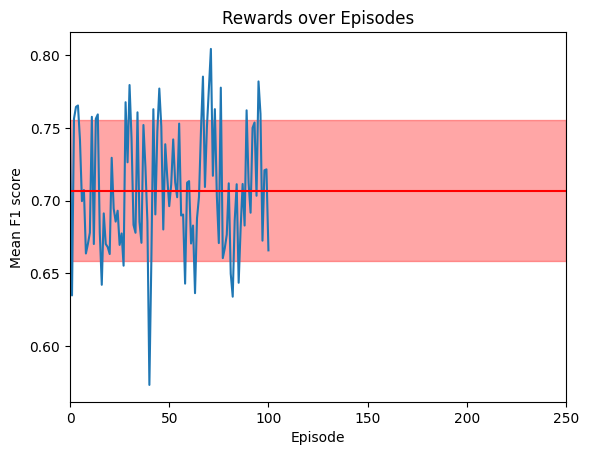

Episode: 100 Prompt: ['structure', 'subject', 'material', 'highlight'] Reward: 0.6673154163658911
Best prompt: ['entity', 'detect', 'material', 'find'] Best reward: 0.804462044090527
Episode: 105 Prompt: ['write', 'definition', 'material', 'create'] Reward: 0.6379197077747802
Best prompt: ['entity', 'detect', 'material', 'find'] Best reward: 0.804462044090527
Episode: 110 Prompt: ['presence', 'discover', 'material', 'title'] Reward: 0.684701519313625
Best prompt: ['entity', 'detect', 'material', 'find'] Best reward: 0.804462044090527
Episode: 115 Prompt: ['presence', 'create', 'material', 'uncover'] Reward: 0.6658573247117211
Best prompt: ['entity', 'detect', 'material', 'find'] Best reward: 0.804462044090527


In [ ]:
PROMPTS, PREDICTIONS, SCORES, REWARDS = trainer.do_training(
    random_samples=RANDOM_SAMPLES, prompt=PROMPT_INIT, fixed_ids=FIXED_IDS,
    mean_random=MEAN_RANDOM, std_random=STD_RANDOM,
    episodes=EPISODES, d_embed=D_EMBED, learning_rate=LR,
    scheduler=SCHEDULER, scheduler_period=SCHEDULER_PERIOD,
    vocabulary=VOCABULARY, hidden=HIDDEN, seed=SEED,
    print_interval=PRINT_INTERVAL, save_results=SAVE, plot=PLOT,
    client=OpenAI(api_key=config["OPENAI_API_KEY"]), dataset=DATASET
    )

In [ ]:
# trainer.do_test("distinguish materials distinguish", False, OpenAI(api_key=config["OPENAI_API_KEY"]), "test")